In [17]:
import h5py
import numpy as np

In [18]:
# load data
# filepath to data.hdf5
filepath = '/Users/ksaniee/behave/behavenet/data/musall/vistrained/mSM36/05-Dec-2017/data.hdf5'

In [19]:
f = h5py.File(filepath,'r')

In [20]:
f.keys()

<KeysViewHDF5 ['bin_times', 'images', 'neural', 'regions']>

In [21]:
# 549 trials
f["neural"]

<HDF5 group "/neural" (549 members)>

In [22]:
# each trial has 189 rows (corresponding to frames) and 258 columns (NMF components) 
f["neural"]['trial_0001'].value

<ipython-input-22-0af527f696fa>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  f["neural"]['trial_0001'].value


array([[ 1.3370792e-02, -1.0914367e-02,  9.4556832e-04, ...,
        -5.5515193e-03,  3.1571817e-03,  9.7376462e-03],
       [ 1.9240052e-02, -1.2089023e-02,  1.5077912e-03, ...,
        -9.0349745e-04,  3.8396392e-03,  1.0436553e-02],
       [ 1.2572746e-02, -7.2555840e-03,  7.2542601e-04, ...,
        -2.3740341e-03,  1.8776620e-03,  9.2322761e-03],
       ...,
       [-1.9203806e-02,  1.0467880e-02, -4.9545565e-03, ...,
         6.8456393e-05,  9.0601941e-04, -2.5707184e-04],
       [-2.1751428e-02, -8.5896795e-04,  3.1285675e-03, ...,
         8.2155187e-03,  1.1662587e-03,  1.6167935e-03],
       [-1.1672830e-02,  1.4139949e-02, -3.1983778e-03, ...,
         2.3608729e-03, -4.1563162e-03,  5.8648963e-03]], dtype=float32)

In [53]:
# stack everything
data = np.vstack([f["neural"]['trial_'+str(i).zfill(4)].value 
           for i in range(549)])

data.shape

<ipython-input-53-d88b57b5c80b>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = np.vstack([f["neural"]['trial_'+str(i).zfill(4)].value


(103761, 258)

In [24]:
# check
103761/189

549.0

In [26]:
f["neural"]['trial_0001'].value

<ipython-input-26-592cd691de12>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  f["neural"]['trial_0001'].value


array([[ 1.3370792e-02, -1.0914367e-02,  9.4556832e-04, ...,
        -5.5515193e-03,  3.1571817e-03,  9.7376462e-03],
       [ 1.9240052e-02, -1.2089023e-02,  1.5077912e-03, ...,
        -9.0349745e-04,  3.8396392e-03,  1.0436553e-02],
       [ 1.2572746e-02, -7.2555840e-03,  7.2542601e-04, ...,
        -2.3740341e-03,  1.8776620e-03,  9.2322761e-03],
       ...,
       [-1.9203806e-02,  1.0467880e-02, -4.9545565e-03, ...,
         6.8456393e-05,  9.0601941e-04, -2.5707184e-04],
       [-2.1751428e-02, -8.5896795e-04,  3.1285675e-03, ...,
         8.2155187e-03,  1.1662587e-03,  1.6167935e-03],
       [-1.1672830e-02,  1.4139949e-02, -3.1983778e-03, ...,
         2.3608729e-03, -4.1563162e-03,  5.8648963e-03]], dtype=float32)

In [30]:
# get trial markers
import scipy.io as sio
sess_idx = 0
trial_info_pathname = '/Users/ksaniee/behave/behavenet/data/musall/vistrained/mSM36/05-Dec-2017/trialmarkers.mat'
trial_info = sio.loadmat(trial_info_pathname)



In [29]:
trial_info.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CorrectSide', 'ResponseSide', 'Rewarded', 'levGrabL', 'levGrabR', 'levReleaseL', 'levReleaseR', 'leverIn', 'lickL', 'lickR', 'spoutTime', 'stimTime', 'water'])

In [37]:
trial_info['stimTime']

array([[81, 82, 90, 81, 81, 84, 85, 82, 81, 89, 88, 86, 88, 89, 81, 85,
        81, 89, 86, 85, 81, 82, 81, 81, 85, 82, 89, 89, 81, 85, 84, 82,
        88, 82, 89, 89, 81, 86, 89, 85, 90, 89, 89, 89, 82, 89, 88, 82,
        88, 89, 81, 89, 89, 89, 84, 82, 81, 85, 85, 86, 86, 85, 89, 85,
        85, 81, 89, 88, 84, 81, 89, 89, 89, 81, 89, 89, 82, 88, 85, 89,
        84, 81, 85, 85, 81, 81, 82, 82, 88, 84, 89, 88, 85, 81, 85, 86,
        81, 82, 85, 85, 88, 89, 81, 89, 85, 89, 81, 88, 85, 85, 89, 85,
        89, 85, 85, 89, 82, 82, 81, 89, 81, 89, 89, 88, 85, 84, 81, 85,
        82, 81, 85, 82, 86, 81, 82, 86, 89, 85, 89, 85, 88, 88, 89, 81,
        89, 85, 89, 81, 85, 85, 85, 89, 81, 86, 81, 89, 81, 85, 89, 81,
        85, 85, 81, 89, 81, 81, 85, 86, 89, 81, 85, 89, 84, 81, 85, 81,
        81, 81, 85, 86, 85, 84, 81, 88, 85, 82, 86, 85, 88, 85, 81, 81,
        85, 89, 89, 81, 85, 89, 85, 81, 85, 81, 81, 81, 85, 85, 81, 88,
        85, 85, 85, 85, 88, 89, 89, 86, 85, 81, 89, 85, 82, 89, 

In [58]:
data = data.reshape((-1,189,258))

In [60]:
data[1][trial_info['stimTime'][0][1]-30:trial_info['stimTime'][0][1]+30,:].shape

(60, 258)

In [65]:
newdata = np.zeros((549,60,258))

for i,a in enumerate(data.reshape((-1,189,258))):
    newdata[i] = a[trial_info['stimTime'][0][1]-30:trial_info['stimTime'][0][1]+30,:]

In [66]:
data = newdata
del newdata

In [32]:
# correct side and mouse decision
trial_info['CorrectSide'], trial_info['ResponseSide'], 

(array([[1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
         1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
         2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
         2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1,
         2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1,
         2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2,
         1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
         2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
         1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
         1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
         1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
         2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2,
         2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
         1, 2, 1, 1, 2, 2

In [69]:
response = trial_info['ResponseSide'][0]

In [81]:
np.argmin(response)

numpy.float64

In [85]:
idxs = [i for i in range(549) if i!=318]

In [88]:
data = data[idxs]

In [105]:
response=response[idxs]

In [107]:
# data loader
train_dataset = torch.utils.data.TensorDataset(
    torch.Tensor(data[:400]), 
    torch.Tensor(response-1).type(torch.LongTensor)[:400])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_dataset = torch.utils.data.TensorDataset(
    torch.Tensor(data[400:500]),
    torch.Tensor(response-1).type(torch.LongTensor)[400:500])

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

In [120]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tensorboardX import SummaryWriter
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from tqdm import tqdm, trange

writer = SummaryWriter()
sns.set()
sns.set_style("dark")
sns.set_palette("muted")
sns.set_color_codes("muted")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
LOADER_KWARGS = {'num_workers': 1, 'pin_memory': True} if torch.cuda.is_available() else {}
print(torch.cuda.is_available())

BATCH_SIZE = 50
TEST_BATCH_SIZE = 5


TRAIN_SIZE = len(train_loader.dataset)
TEST_SIZE = len(test_loader.dataset)
NUM_BATCHES = len(train_loader)
NUM_TEST_BATCHES = len(test_loader)

CLASSES = 2
TRAIN_EPOCHS = 20
SAMPLES = 2
TEST_SAMPLES = 10

assert (TRAIN_SIZE % BATCH_SIZE) == 0
assert (TEST_SIZE % TEST_BATCH_SIZE) == 0

class Gaussian(object):
    def __init__(self, mu, rho):
        super().__init__()
        self.mu = mu
        self.rho = rho
        self.normal = torch.distributions.Normal(0,1)
    
    @property
    def sigma(self):
        return torch.log1p(torch.exp(self.rho))
    
    def sample(self):
        epsilon = self.normal.sample(self.rho.size()).to(DEVICE)
        return self.mu + self.sigma * epsilon
    
    def log_prob(self, input):
        return (-math.log(math.sqrt(2*math.pi))
                - torch.log(self.sigma)
                - ((input - self.mu)**2)/(2*self.sigma**2)).sum()

class ScaleMixtureGaussian(object):
    def __init__(self, pi, sigma1, sigma2):
        super().__init__()
        self.pi = pi
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.gaussian1 = torch.distributions.Normal(0,sigma1)
        self.gaussian2 = torch.distributions.Normal(0,sigma2)
    
    def log_prob(self, input):
        prob1 = torch.exp(self.gaussian1.log_prob(input))
        prob2 = torch.exp(self.gaussian2.log_prob(input))
        return (torch.log(self.pi*prob1 + (1-self.pi)*prob2)).sum()
    
PI = 0.5
SIGMA_1 = torch.FloatTensor([math.exp(-0)])
SIGMA_2 = torch.FloatTensor([math.exp(-6)])

class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        # Weight params
        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-0.2, 0.2))
        self.weight_rho = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-5,-4))
        self.weight = Gaussian(self.weight_mu, self.weight_rho)
        # Bias params
        self.bias_mu = nn.Parameter(torch.Tensor(out_features).uniform_(-0.2, 0.2))
        self.bias_rho = nn.Parameter(torch.Tensor(out_features).uniform_(-5,-4))
        self.bias = Gaussian(self.bias_mu, self.bias_rho)
        # Prior distributions
        self.weight_prior = ScaleMixtureGaussian(PI, SIGMA_1, SIGMA_2)
        self.bias_prior = ScaleMixtureGaussian(PI, SIGMA_1, SIGMA_2)
        self.log_prior = 0
        self.log_variational_posterior = 0
        
    def forward(self, input, sample=False, calculate_log_probs=False):
        if self.training or sample:
            weight = self.weight.sample()
            bias = self.bias.sample()
        else:
            weight = self.weight.mu
            bias = self.bias.mu
        if self.training or calculate_log_probs:
            self.log_prior = self.weight_prior.log_prob(weight) + self.bias_prior.log_prob(bias)
            self.log_variational_posterior = self.weight.log_prob(weight) + self.bias.log_prob(bias)
        else:
            self.log_prior, self.log_variational_posterior = 0, 0
        return F.linear(input, weight, bias)
    
    
class BayesianNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = BayesianLinear(60*258, 1000)
        self.l2 = BayesianLinear(1000, 40)
        self.l3 = BayesianLinear(40, 2)
    
    def forward(self, x, sample=False):
        x = x.view(-1, 60*258)
        #print(x.size())
        x = F.tanh(self.l1(x, sample))
        #print(x.size())
        x = F.tanh(self.l2(x, sample))
        x = F.log_softmax(self.l3(x, sample), dim=1)
        return x
    
    def log_prior(self):
        return self.l1.log_prior \
               + self.l2.log_prior \
               + self.l3.log_prior
    
    def log_variational_posterior(self):
        return self.l1.log_variational_posterior \
               + self.l2.log_variational_posterior \
               + self.l3.log_variational_posterior
    
    #changed CLASSES to self.l3.out_features to allow for multiple class sizes
    def sample_elbo(self, input, target, samples=SAMPLES):
        outputs = torch.zeros(samples, BATCH_SIZE, self.l3.out_features).to(DEVICE)
        log_priors = torch.zeros(samples).to(DEVICE)
        log_variational_posteriors = torch.zeros(samples).to(DEVICE)
        for i in range(samples):
            outputs[i] = self(input, sample=True)
            log_priors[i] = self.log_prior()
            log_variational_posteriors[i] = self.log_variational_posterior()
        log_prior = log_priors.mean()
        log_variational_posterior = log_variational_posteriors.mean()
        negative_log_likelihood = F.nll_loss(outputs.mean(0), target, size_average=False)
        loss = (log_variational_posterior - log_prior)/NUM_BATCHES + negative_log_likelihood
        return loss, log_prior, log_variational_posterior, negative_log_likelihood



    
def write_weight_histograms(epoch):
    writer.add_histogram('histogram/w1_mu', net.l1.weight_mu,epoch)
    writer.add_histogram('histogram/w1_rho', net.l1.weight_rho,epoch)
    writer.add_histogram('histogram/w2_mu', net.l2.weight_mu,epoch)
    writer.add_histogram('histogram/w2_rho', net.l2.weight_rho,epoch)
    writer.add_histogram('histogram/w3_mu', net.l3.weight_mu,epoch)
    writer.add_histogram('histogram/w3_rho', net.l3.weight_rho,epoch)
    writer.add_histogram('histogram/b1_mu', net.l1.bias_mu,epoch)
    writer.add_histogram('histogram/b1_rho', net.l1.bias_rho,epoch)
    writer.add_histogram('histogram/b2_mu', net.l2.bias_mu,epoch)
    writer.add_histogram('histogram/b2_rho', net.l2.bias_rho,epoch)
    writer.add_histogram('histogram/b3_mu', net.l3.bias_mu,epoch)
    writer.add_histogram('histogram/b3_rho', net.l3.bias_rho,epoch)

def write_loss_scalars(epoch, batch_idx, loss, log_prior, log_variational_posterior, negative_log_likelihood):
    writer.add_scalar('logs/loss', loss, epoch*NUM_BATCHES+batch_idx)
    writer.add_scalar('logs/complexity_cost', log_variational_posterior-log_prior, epoch*NUM_BATCHES+batch_idx)
    writer.add_scalar('logs/log_prior', log_prior, epoch*NUM_BATCHES+batch_idx)
    writer.add_scalar('logs/log_variational_posterior', log_variational_posterior, epoch*NUM_BATCHES+batch_idx)
    writer.add_scalar('logs/negative_log_likelihood', negative_log_likelihood, epoch*NUM_BATCHES+batch_idx)
    
    
    
def train(net, optimizer, epoch, train_loader):
    net.train()
    if epoch == 0: # write initial distributions
        write_weight_histograms(epoch)
    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(DEVICE), target.to(DEVICE)
        net.zero_grad()
        loss, log_prior, log_variational_posterior, negative_log_likelihood = net.sample_elbo(data, target)
        loss.backward()
        optimizer.step()
        write_loss_scalars(epoch, batch_idx, loss, log_prior, log_variational_posterior, negative_log_likelihood)
    write_weight_histograms(epoch+1)
    
    
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'




False


In [121]:
net = BayesianNetwork().to(DEVICE)
optimizer = optim.Adam(net.parameters())
for epoch in range(10):
    train(net, optimizer, epoch,train_loader)

print('pretrained %d epochs on data' %10)

  0%|          | 0/8 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 8/8 [00:27<00:00,  3.47s/it]


pretrained 10 epochs on data


In [116]:
60*258

15480

In [117]:
28*28

784

In [122]:
def test_ensemble():
    net.eval()
    correct = 0
    corrects = np.zeros(TEST_SAMPLES+1, dtype=int)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            outputs = torch.zeros(TEST_SAMPLES+1, TEST_BATCH_SIZE, CLASSES).to(DEVICE)
            for i in range(TEST_SAMPLES):
                outputs[i] = net(data, sample=True)
            outputs[TEST_SAMPLES] = net(data, sample=False)
            output = outputs.mean(0)
            preds = preds = outputs.max(2, keepdim=True)[1]
            pred = output.max(1, keepdim=True)[1] # index of max log-probability
            corrects += preds.eq(target.view_as(pred)).sum(dim=1).squeeze().cpu().numpy()
            correct += pred.eq(target.view_as(pred)).sum().item()
    for index, num in enumerate(corrects):
        if index < TEST_SAMPLES:
            print('Component {} Accuracy: {}/{}'.format(index, num, TEST_SIZE))
        else:
            print('Posterior Mean Accuracy: {}/{}'.format(num, TEST_SIZE))
    print('Ensemble Accuracy: {}/{}'.format(correct, TEST_SIZE))

test_ensemble()

Component 0 Accuracy: 80/100
Component 1 Accuracy: 79/100
Component 2 Accuracy: 81/100
Component 3 Accuracy: 81/100
Component 4 Accuracy: 80/100
Component 5 Accuracy: 79/100
Component 6 Accuracy: 82/100
Component 7 Accuracy: 80/100
Component 8 Accuracy: 81/100
Component 9 Accuracy: 80/100
Posterior Mean Accuracy: 80/100
Ensemble Accuracy: 80/100


No handles with labels found to put in legend.


Text(0.5, 1.0, 'mu/sigma (layer 2)')

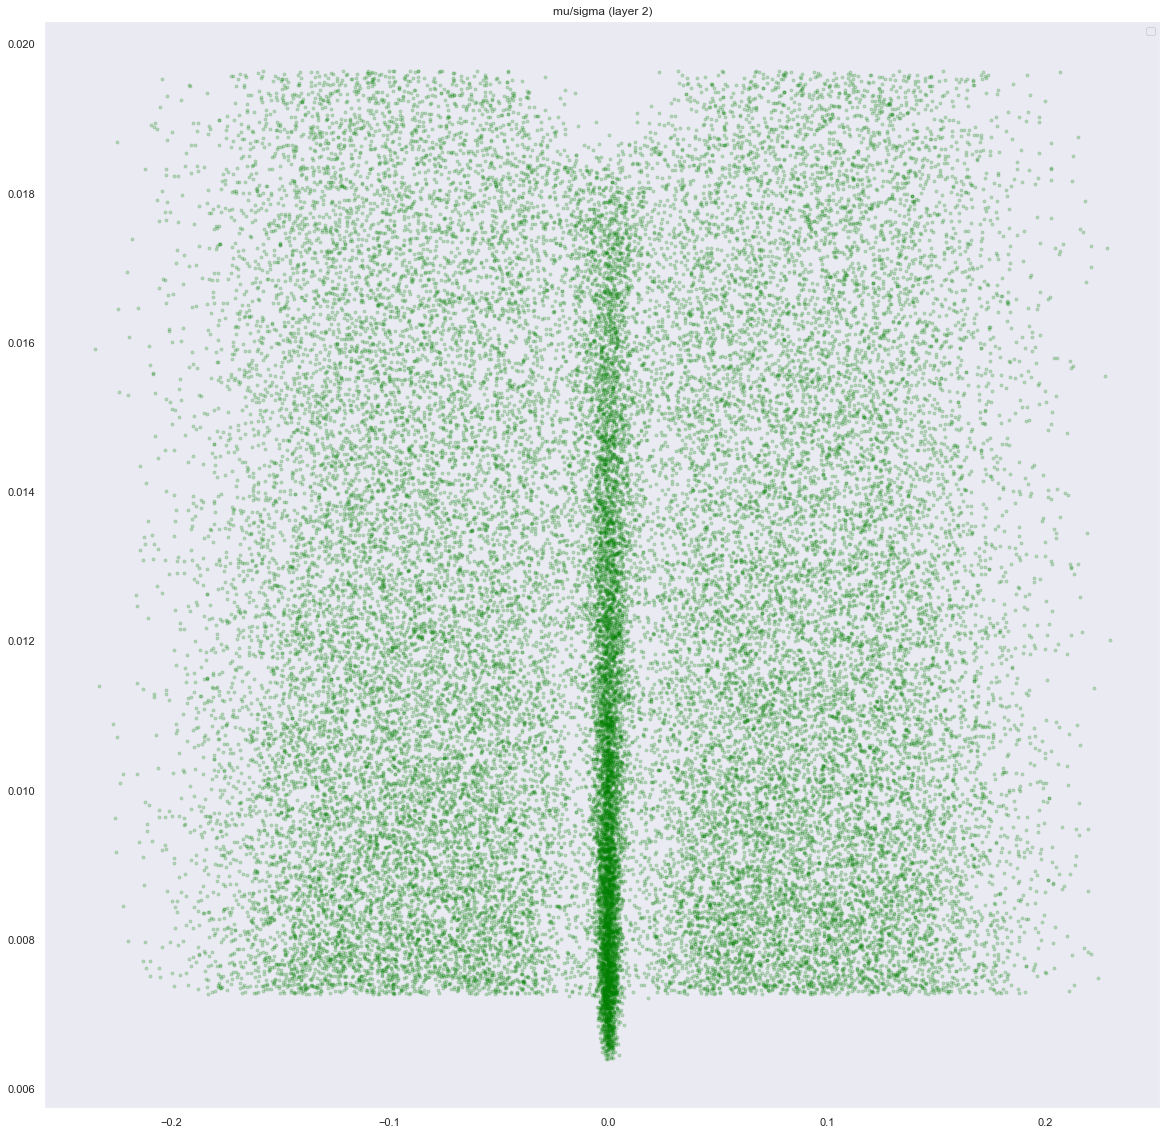

In [126]:
#fmnist and emnist-pretrained nets layer 2 weights 
fig=plt.figure(figsize=(20,20))
plt.scatter(net.l2.weight_mu.detach().reshape((-1)).numpy(),torch.log1p(torch.exp(net.l2.weight_rho)).reshape((-1)).detach().numpy(),color='green',alpha=0.2,marker='.')

plt.legend(loc=1);  plt.title('mu/sigma (layer 2)')

Text(0.5, 1.0, 'mu/sigma (layer 3)')

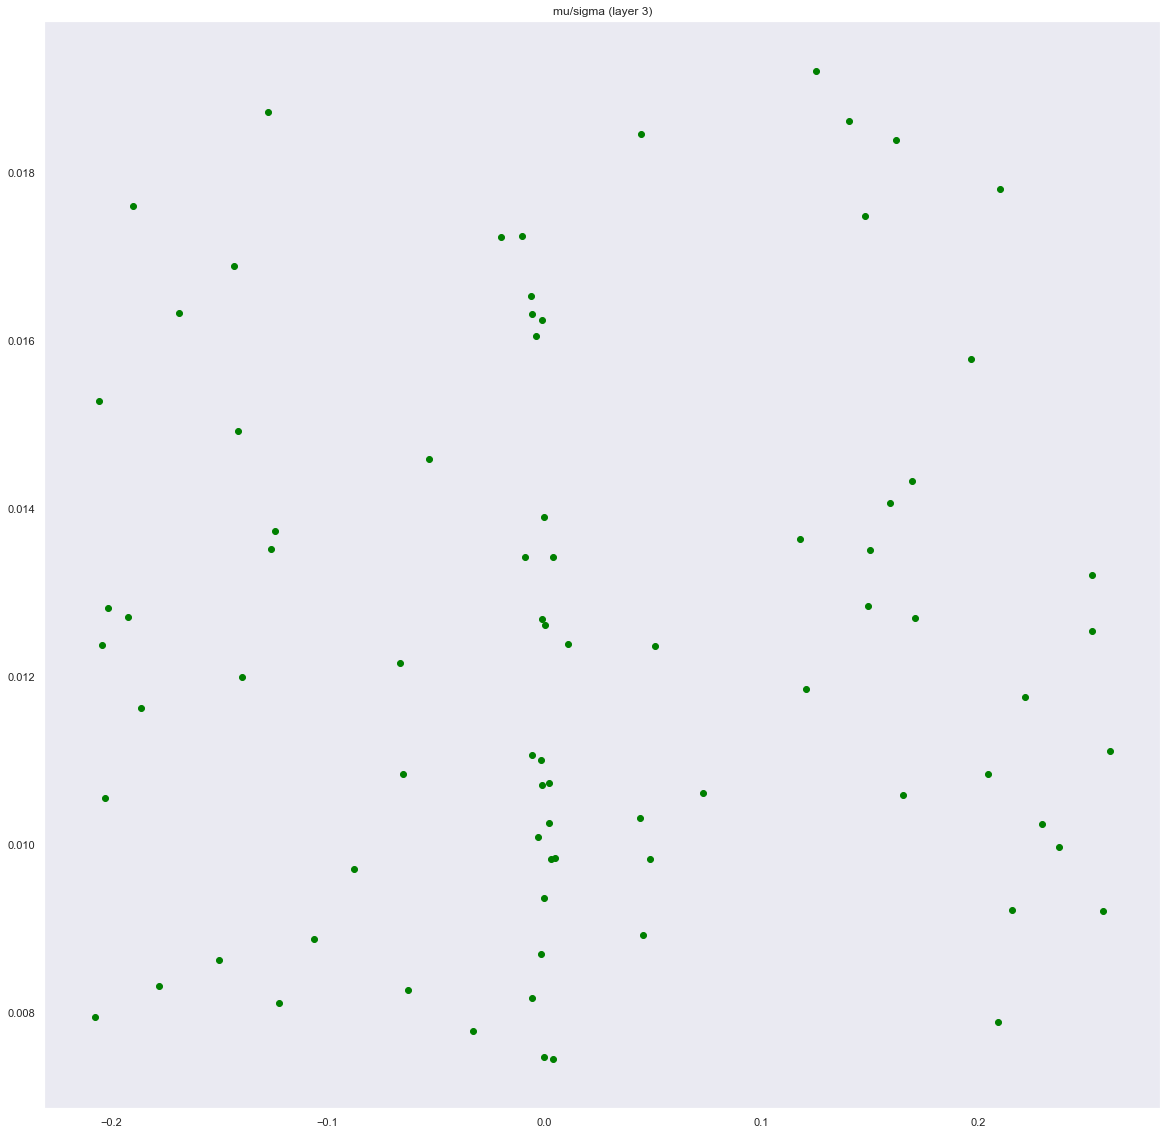

In [141]:
#fmnist and emnist-pretrained nets layer 2 weights 
fig=plt.figure(figsize=(20,20))
plt.scatter(net.l3.weight_mu.detach().reshape((-1)).numpy(),torch.log1p(torch.exp(net.l3.weight_rho)).reshape((-1)).detach().numpy(),color='green',alpha=1,marker='o')

plt.title('mu/sigma (layer 3)')

In [142]:
sample = iter(test_loader).next()
sample[0] = sample[0].to(DEVICE)

<ipython-input-171-6604570140be>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(10,1,i+1)


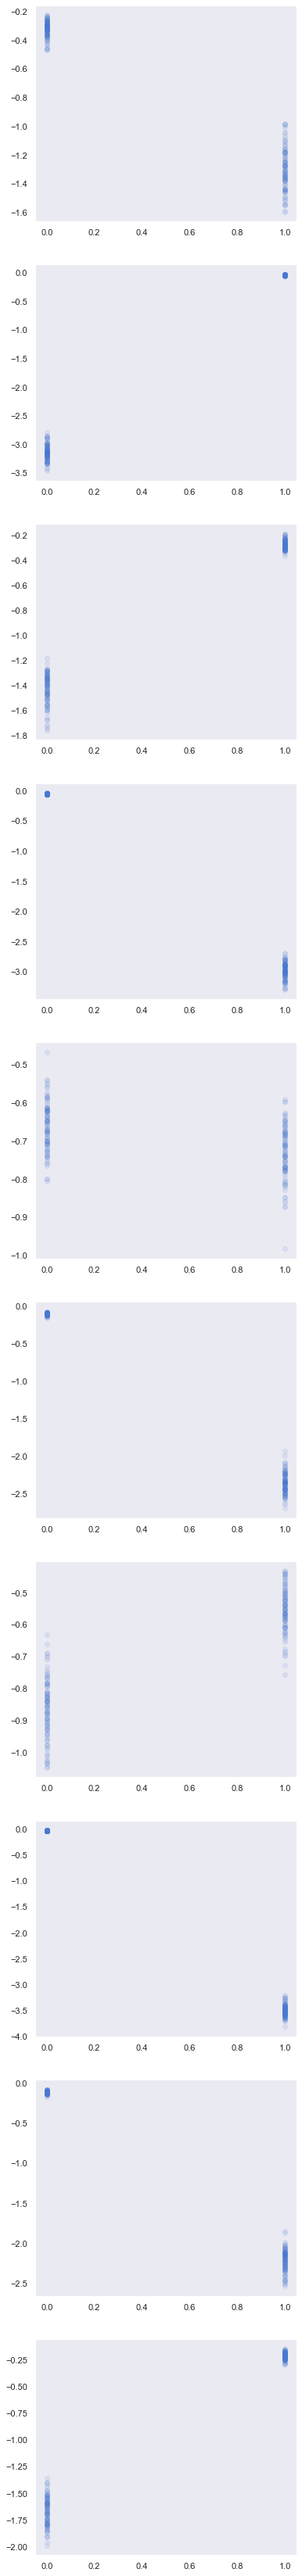

In [171]:
fig = plt.figure(figsize=(6, 60))

for i in range(10):

    #fig=plt.figure()
    for _ in range(100):
        plt.subplot(10,1,i+1)
        plt.scatter(np.arange(2),net(test_dataset[i][0], True).detach().cpu().numpy(), alpha=0.1,c='b')

In [169]:
net(sample[0], True).detach().cpu().numpy()

array([[-0.24096991, -1.5411499 ],
       [-3.0839183 , -0.04686048],
       [-1.2841141 , -0.32420188],
       [-0.03717426, -3.3106675 ],
       [-0.65772474, -0.7298707 ]], dtype=float32)

In [172]:
[test_dataset[i][1] for i in range(10)]

[tensor(1),
 tensor(1),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1)]

In [185]:
# Actual error rate is similar to this net
(trial_info['CorrectSide'][0][400:500] == trial_info['ResponseSide'][0][400:500]).sum()

88

In [ ]:
# trials where mouse right/wrong
# predict stimulus
# test set training 
# deocidng both stim and decision
# neuro question / quality of stimulus encoding